In [ ]:
!jupyter contrib nbextension install --user
!jupyter nbextension enable --py widgetsnbextension

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from glob import glob

import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(style="whitegrid")
sns.set_context('paper')

In [2]:
base_dir = "FR_RESULTS/" # CHANGE TO "TEXAS_IDF_RESULTS" to plot the results obtained on the "Ile de France + Texas" dataset

In [3]:
DATASET = "FRANCE" # Change dataset name to IDF_TEXAS if base_dir = "TEXAS_IDF_RESULTS"
fns = glob(base_dir + "/*.json")

In [4]:
json.load(open(fns[0]))

{'dataset_name': 'FR.txt',
 'rel_code': 'A',
 'cooc_sample_size': 3,
 'adj_iteration': 1,
 'ngram_size': 4,
 'tolerance_value': 0.002,
 'epochs': 100,
 'embedding_dim': 256,
 'word2vec_iter_nb': 50,
 'index_fn': 'outputs/FR.txt_100_4_0.002__A_index',
 'keras_model_fn': 'outputs/FR.txt_100_4_0.002__A.h5',
 'train_test_history_fn': 'outputs/FR.txt_100_4_0.002__A.csv'}

In [5]:
def decode_fn(filename):
    """
    Extract data and metadata from an output log file
    """
    data = json.load(open(filename))
    return {
        "dataset":data["dataset_name"],
        "epochs":data["epochs"],
        "ngram size":data["ngram_size"],
        "k":data["tolerance_value"],
        "tuple" : data["rel_code"],
        "data":pd.read_csv(base_dir + data["train_test_history_fn"].split("/")[-1],index_col=0)
    }

def plot(fig,ax,data,keys,test=False):
    """
    Generate a plot from an output log 
    """
    for k in keys:
        new_k = k
        label = "{0}-N{1} (Train)".format("LSTM",data["ngram size"])
        data["data"][new_k].plot(label=label,legend=True,ax=ax)#+" Train",legend=True)#,color=color[k],ax=ax)
        if test:
            new_k="val_"+new_k
        label = "{0}-N{1} (Test)".format("LSTM",data["ngram size"])
        data["data"][new_k].plot(label=label,legend=True,ax=ax,linestyle='--')#+" Train",legend=True)#,color=color[k],ax=ax)
    
    ax.legend(bbox_to_anchor=(1.04,1), prop={'size': 15})
    ax.set_ylim((0,1))

In [6]:
kvalue = widgets.Dropdown(
    options=[0.001,0.002],
    value=0.002,
    description='K-value:',
    disabled=False,
)
spatrel = widgets.Dropdown(
    options=["I","A","AI","AIC","AC","IC","C"],
    value="I",
    description='Spatial Relation Used:',
    disabled=False,
)

def foo(kvalue,spatrel):
    keys=["Output_LON_accuracy_at_k_lon"]#,"Output_LAT_accuracy_at_k"]
    fig, (ax,ax2) = plt.subplots(2,figsize=(10,10))
    for fn in fns:
        data = decode_fn(fn)
        if data["tuple"] == spatrel and data["k"] == kvalue:
            plot(fig,ax,data,keys,test=True)
        
    ax.set_title("Longitude")
    keys=["Output_LAT_accuracy_at_k_lat"]
    for fn in fns:
        data = decode_fn(fn)
        if data["tuple"] == spatrel and data["k"] == kvalue:
            plot(fig,ax2,data,keys,test=True)
    ax2.set_title("Latitude")
    fig.suptitle("LSTM - accuracy@100km - 4-grams - Relation used {0}".format(spatrel),y=0.95,weight="bold")
    #plt.savefig("{2}_LSTM_{0}_{1}.png".format(kvalue,spatrel,DATASET),bbox_inches = 'tight')

interact(foo,kvalue=kvalue,spatrel=spatrel)

interactive(children=(Dropdown(description='K-value:', index=1, options=(0.001, 0.002), value=0.002), Dropdown…

<function __main__.foo(kvalue, spatrel)>

In [7]:
data = decode_fn(fns[0])
df = data["data"]
df["Relation(s) Used"] = data["tuple"]
df["epochs"] = np.arange(100)
for fn in fns[1:]:
    data = decode_fn(fn)
    new_df = data["data"]
    new_df["epochs"] = np.arange(100)
    new_df["Relation(s) Used"] = data["tuple"]
    df = pd.concat((df,new_df))

In [8]:
df.sort_values(by="Relation(s) Used")

val_loss  val_Output_LON_loss  val_Output_LAT_loss  \
0   0.000115             0.000045             0.000070   
72  0.000058             0.000022             0.000036   
71  0.000058             0.000022             0.000036   
70  0.000056             0.000022             0.000034   
69  0.000058             0.000022             0.000036   
..       ...                  ...                  ...   
27  0.000084             0.000030             0.000054   
26  0.000084             0.000032             0.000051   
24  0.000084             0.000027             0.000057   
35  0.000090             0.000032             0.000058   
99  0.000096             0.000031             0.000065   

    val_Output_LON_accuracy_at_k_lon  val_Output_LAT_accuracy_at_k_lat  \
0                           0.295377                          0.509287   
72                          0.584888                          0.779450   
71                          0.587047                          0.775844   
70                          0.591935                          0.784623   
69                          0.586314                          0.775825   
..                               ...                               ...   
27                          0.699088                          0.819236   
26                          0.696359                          0.823050   
24                          0.673946                          0.816693   
35                          0.713059                          0.829505   
99                          0.740629                          0.841372   

        loss  Output_LON_loss  Output_LAT_loss  Output_LON_accuracy_at_k_lon  \
0   0.000381         0.000188         0.000193                      0.273675   
72  0.000004         0.000002         0.000003                      0.957315   
71  0.000004         0.000002         0.000003                      0.954727   
70  0.000005         0.000002         0.000003                      0.953021   
69  0.000005         0.000002         0.000003                      0.950501   
..       ...              ...              ...                           ...   
27  0.000030         0.000013         0.000018                      0.726226   
26  0.000034         0.000014         0.000021                      0.709992   
24  0.000032         0.000013         0.000019                      0.718581   
35  0.000024         0.000010         0.000014                      0.760739   
99  0.000010         0.000005         0.000006                      0.872880   

    Output_LAT_accuracy_at_k_lat Relation(s) Used  epochs  
0                       0.425386                A       0  
72                      0.995521                A      72  
71                      0.995618                A      71  
70                      0.994972                A      70  
69                      0.994548                A      69  
..                           ...              ...     ...  
27                      0.883270               IC      27  
26                      0.865662               IC      26  
24                      0.875147               IC      24  
35                      0.911580               IC      35  
99                      0.972612               IC      99  

[700 rows x 12 columns]

In [9]:
df = df[df.epochs.isin(list(range(0,100,5)))]

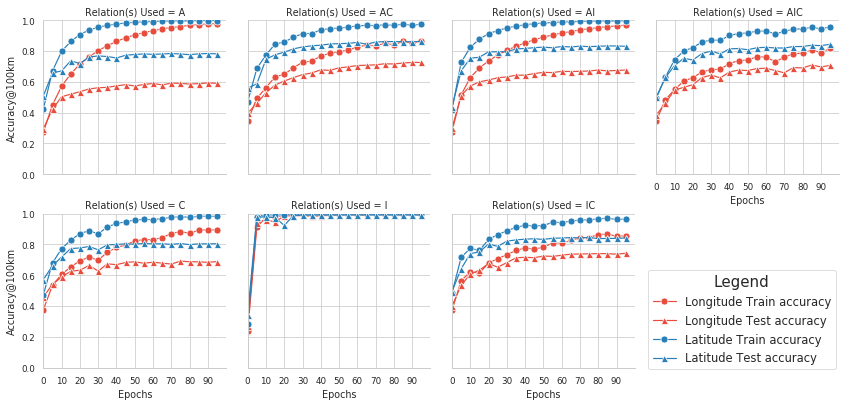

In [10]:
g = sns.FacetGrid(df, col="Relation(s) Used", col_wrap=4, height=3, ylim=(0, 1),xlim=(0,100))

g.map(sns.lineplot,"epochs", "Output_LON_accuracy_at_k_lon", color="#e74c3c", ci=None,label="Longitude Train accuracy",marker="o",markersize=7);
g.map(sns.lineplot,"epochs", "val_Output_LON_accuracy_at_k_lon", color="#e74c3c", ci=None,label="Longitude Test accuracy",marker="^",markersize=7);

g.map(sns.lineplot,"epochs", "Output_LAT_accuracy_at_k_lat", color="#2980b9", ci=None,label="Latitude Train accuracy",marker="o",markersize=7);
g.map(sns.lineplot,"epochs", "val_Output_LAT_accuracy_at_k_lat", color="#2980b9", ci=None,label="Latitude Test accuracy",marker="^",markersize=7);
g.set(xlabel='Epochs', ylabel='Accuracy@100km')
g.set(xticks=np.arange(0,100,10))
g.add_legend(bbox_to_anchor=(0.80, 0.20),fontsize="large",title="Legend",title_fontsize="40",frameon=True)
#g.fig.suptitle('Longitude Prediction (Accuracy@100km)',position=(0.58,.09),fontsize=15)
g.fig.subplots_adjust(top=.9)
plt.setp(g._legend.get_title(), fontsize=15)
#plt.savefig("../resulat_viz/{0}_100km.pdf".format(DATASET),bbox_inches = 'tight') # If you wish to save the figure